 # Tratamento de Dados de Telescópio
 **Equipe:** Daniel, Jones, Kleberson e Murilo

 ## Apresentação
 ### O Telescópio Kepler e a Descoberta de Exoplanetas

 <p align = "center">
 <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/91/NASA-KeplerSpaceTelescope-ArtistConcept-20141027.jpg/500px-NASA-KeplerSpaceTelescope-ArtistConcept-20141027.jpg", width="500">
 <p>

 #### Introdução
 - O Telescópio Espacial Kepler, lançado pela NASA em 2009, foi projetado para descobrir exoplanetas, <br>
   ou seja, planetas que orbitam estrelas fora do nosso sistema solar.
 - A missão Kepler teve como objetivo principal explorar a estrutura e a diversidade dos sistemas <br>
 planetários, contribuindo significativamente para a nossa compreensão do universo.

 #### Objetivos da Missão Kepler
 - **Exploração da Diversidade Planetária**: Investigar a variedade de planetas e suas características.
 - **Identificação de Exoplanetas**: Detectar planetas do tamanho da Terra na zona habitável de sua estrela - onde água líquida pode existir
 possibilitando também a vida.
 - **Coleta de Dados**: Fornecer dados extensivos que apoiem futuras missões da NASA e pesquisas científicas.

 #### O Conjunto de Dados
 - Como obtém os dados?
   - **Método de trânsito**: Observava continuamente o brilho de estrelas.
   - Quando um planeta passava em frente à sua estrela (do ponto de vista da Terra),
     o brilho da estrela diminuía um pouco.
   - Esse pequena variação ajudava a identificar a presença de um planeta.
 - O conjunto de dados contém informações sobre aproximadamente **3.373 exoplanetas confirmados**.
 - Inclui dados coletados durante as missões Kepler e K2, abrangendo vários anos de observação.
 - **Informações Disponíveis**:
   - Nome da estrela hospedeira
   - Características dos planetas (tamanho, massa, composição)
   - Parâmetros orbitais (período orbital, distância da estrela)
   - Métodos de descoberta (transito, velocidade radial)
   - Propriedades estelares (tipo de estrela, temperatura)

 #### Importância dos Dados
 - Os dados do Kepler são cruciais para entender a formação e evolução dos sistemas planetários.
 - Permitem a análise estatística da distribuição de exoplanetas em diferentes tipos de estrelas e suas <br>características.
 - A pesquisa com esses dados pode revelar padrões que ajudam a identificar quais sistemas planetários <br> têm maior probabilidade de abrigar vida.

 #### Mas... por que o Kepler?
 - Primeiro dedicado para descobrir exoplanetas
 - Alta precisão em suas análises, pois tinha 4 rodas de reação
 - Apontava para a mesma região por anos com precisão.
 #### Kepler 2
 - Extensão da missão original, porém outro foco
 - Primeiro: O que são roda de reação e como funcionam?
   - São dispositivos usados para manter a orientação do telescópio no espaço, sem usar combustível.
     Ele tinha 4 rodas de reação.
   - São volantes giratórios internos que controlam a orientação do telescópio pela conservação do momento angular (tipo giroscópio).
   - Ao controlar a aceleração, o telescópio gira na direção oposta - isso permite regular a precisão.
 - Quebra das rodas
   - A primeira roda deu problema em 2012, a segunda em 2013 — com isso, a missão original não pôde continuar,
     mas o telescópio ainda estava funcional para a missão K2.
   - Tempo de vida curto.


 ## Tratamento de Dados
 **Bibliotecas Necessárias**

In [315]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, shapiro, binom, t

 **Filtragem dos Dados**

In [316]:
# 1) Lê o CSV para um DataFrame
df_original = pd.read_csv('data/planets.csv')

# Constantes
AU_m = 1.496e+11            # Unidade Astronômica em metros
# AU_km = 1.496e+8            # Unidade Astronômica em km
AU_rj = 69911 / 1.496e+8    # Raio de Júpiter / Unidade Astronômica em km
AU_rs = 696340 / 1.496e+8   # Raio do Sol / Unidade Astronômica em km
G = 6.67384e-11

# 2) Máscara para filtrar os dados mantendo só as linhas onde 'col_importante' NÃO é NaN
mask = (
    (df_original['pl_hostname'] != '') &
    (df_original['pl_pnum'] != '') &
    (df_original['pl_orbper'].notna()) &
    (df_original['pl_orbsmax'].notna()) &
    (df_original['pl_orbeccen'].notna()) &
    (df_original['pl_orbincl'].notna()) &
    (df_original['pl_bmassj'] != '') &
    (df_original['pl_radj'].notna()) &
    (df_original['pl_dens'].notna()) &
    (df_original['st_dist'].notna()) &
    (df_original['st_teff'].notna()) &
    (df_original['st_mass'].notna()) &
    (df_original['st_rad'].notna())
)

df = df_original[mask]

# 3) A partir daqui use df para suas análises
print(f"Quantidade de dados que serão utilizados nos testes: {len(df)}")

Quantidade de dados que serão utilizados nos testes: 225


 ## Utilizando os Dados

 ### Semieixo Maior
 O semieixo maior é um termo fundamental em geometria e astronomia. Em uma elipse, ele representa a metade <br> do eixo maior, a distância do centro da elipse ao ponto mais distante da curva. Em astronomia, o semieixo maior <br> descreve a distância média de um objeto que orbita outro, como um planeta em torno do Sol.

 - O semieixo maior "a" caracteriza o tamanho médio da órbita e está diretamente relacionado ao período orbital ($T$) <br> pela Terceira Lei de Kepler:
 $T^2 \propto a^3$, onde $T$ é o tempo que o corpo leva para dar uma volta completa.

 - Por que é útil?
     - Permite calcular energia orbital média e velocidade média.
     - Ajuda a determinar o período de revolução.
     - Serve como parâmetro fundamental em simulações e missões espaciais.
     - Nos ajudará a determinar valores de acordo com os dados obtidos.

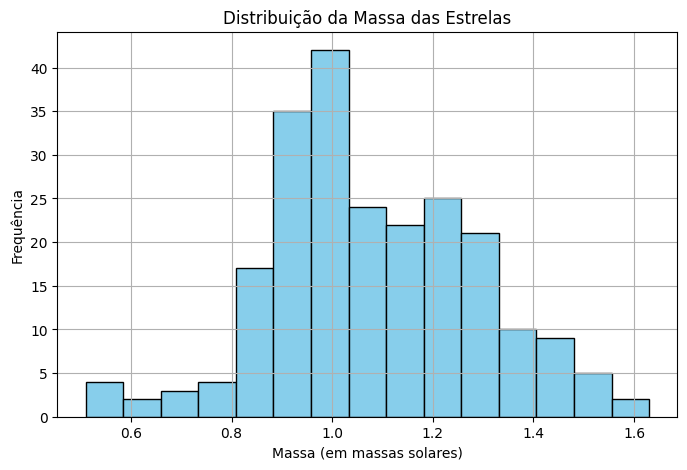

Média da massa das estrelas em Massas Solares 1.0803


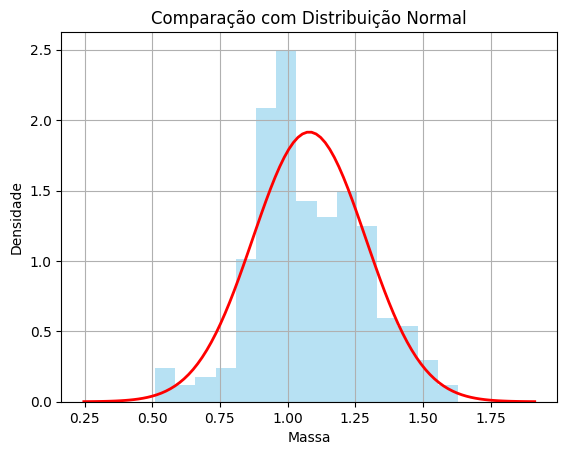

Estatística = 0.9863, p-valor = 0.0287
Distribuição não é normal (rejeita H0)


In [317]:
# Histograma
plt.figure(figsize=(8, 5))
plt.hist(df['st_mass'].dropna(), bins=15, color='skyblue', edgecolor='black')
plt.title('Distribuição da Massa das Estrelas')
plt.xlabel('Massa (em massas solares)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Média da massa das estrelas em Massas Solares
Mmestre = df["st_mass"].mean()
print(f"Média da massa das estrelas em Massas Solares {Mmestre:.4f}")

media = df['st_mass'].mean()
desvio = df['st_mass'].std()
x = np.linspace(media - 4*desvio, media + 4*desvio, 100)
y = norm.pdf(x, media, desvio)

plt.hist(df['st_mass'].dropna(), bins=15, density=True, alpha=0.6, color='skyblue')
plt.plot(x, y, 'r-', lw=2)  # Curva normal
plt.title('Comparação com Distribuição Normal')
plt.xlabel('Massa')
plt.ylabel('Densidade')
plt.grid(True)
plt.show()

stat, p = shapiro(df['st_mass'].dropna())
print(f'Estatística = {stat:.4f}, p-valor = {p:.4f}')
if p > 0.05:
    print("Distribuição aparentemente normal (falha em rejeitar H0)")
else:
    print("Distribuição não é normal (rejeita H0)")

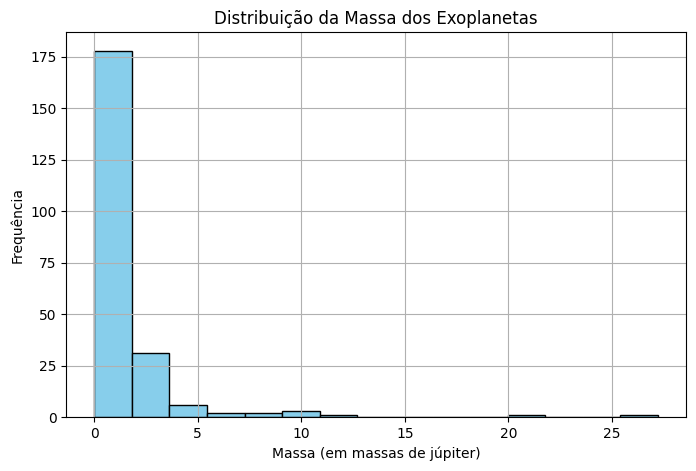

Média da massa dos planetas em Massas de Júpiter 1.5109


In [318]:
# Histograma
plt.figure(figsize=(8, 5))
plt.hist(df['pl_bmassj'].dropna(), bins=15, color='skyblue', edgecolor='black')
plt.title('Distribuição da Massa dos Exoplanetas')
plt.xlabel('Massa (em massas de júpiter)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Média da massa das estrelas em Massas de Júpiter
Mplaneta = df['pl_bmassj'].mean()
print(f"Média da massa dos planetas em Massas de Júpiter {Mplaneta:.4f}")

# sns.kdeplot(df['pl_bmassj'].dropna(), fill=True, color='skyblue')

# stat, p = shapiro(df['st_mass'].dropna())
# print(f'Estatística = {stat:.4f}, p-valor = {p:.4f}')
# if p > 0.05:
#     print("Distribuição aparentemente normal (falha em rejeitar H0)")
# else:
#     print("Distribuição não é normal (rejeita H0)")

 A fórmula do semieixo maior da órbita é dada por:
 $$
 a^3 = \frac{G \cdot (M_{mestre} + M_{planeta} \cdot P^2)}{4\pi^2}
 $$
 Onde
 - $G$ = Constante gravitacional = $6.67384 \times 10^{-11} \textrm{m}^{3}\textrm{kg}^{-1}\textrm{s}^{-2}$ <br>
 - $M_{mestre}$ = Massa do planeta maior <br>
 - $M_{planeta}$ = Massa do planeta menor <br>
 - $P$ = Período orbital em segundos

In [ ]:
# Semieixo maior da [orbita]
# P = df['pl_orbper'].mean() * 86400
# Mmestre_kg = Mmestre * 1.989e+30
# Mplaneta_kg = Mplaneta * 1.898e+27

# Calculando a média do Semieixo Maior
# a_cubo = G * (Mmestre_kg + Mplaneta_kg) * P**2 / (4 * math.pi**2)
a = df['pl_orbsmax'].mean()

# Valor do Semieixo maior com base nas médias
print(f'Semieixo Maior: {a:.3f} UA')

Semieixo Maior: 0.083 UA


 Note que, em média, os exoplanetas encontrados orbitam sua estrela a cerca de 0,083 unidades astronômicas, uma órbita <br> bem mais próxima que a da Terra (1 UA), o que é comum para exoplanetas do tipo "hot Jupiter" (Júpiteres quentes) ou exoplanetas <br> com períodos curtos.

 ### Velocidade Orbital
 Velocidade orbital é a velocidade mínima que um objeto (satélite, nave espacial, asteroide etc.) precisa ter para entrar <br> em órbita estável (circulatória) ao redor de um corpo celeste (planeta, lua, estrela), sem cair de volta nem fugir para o espaço.

 - Para a Terra, essa velocidade na superfície (desprezando atmosfera) é cerca de 7,9 km/s.
 - Se o objeto for lançado mais alto, em altitude h, a velocidade orbital diminui um pouco: quanto maior a distância do centro <br> da Terra, menor a velocidade necessária.

 - Órbitas elípticas
     - Para órbitas elípticas, a velocidade varia ao longo da trajetória: é maior no perigeu (ponto mais próximo) e menor no <br> apogeu (ponto mais distante), obedecendo à conservação de energia (energia cinética + potencial).

 - Importância prática
     - Definir satélites de comunicação, estações espaciais e sondas interplanetárias.
     - Determinar janelas de lançamento e manobras de correção de órbita.

 A fórmula que nos dá velocidade média ao longo de uma volta completa é:
 $$
 V_{orbital} = \frac{2 \cdot \pi \cdot a}{P}
 $$
 Onde
 - $a$ é o semieixo maior da elipse (para órbita circular, $a = r$)
 - $P$ é o período orbital.

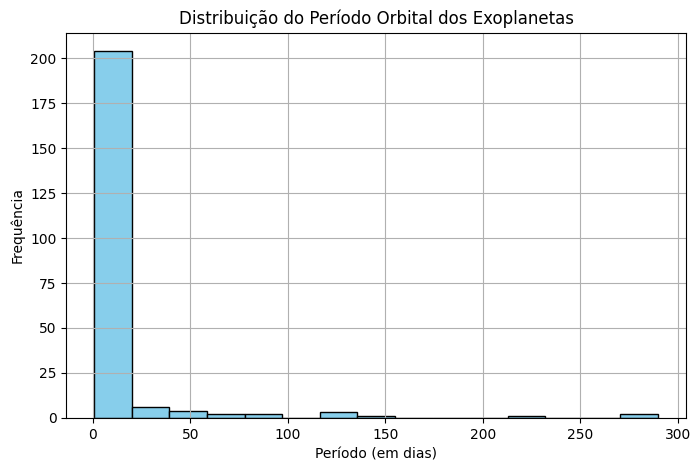

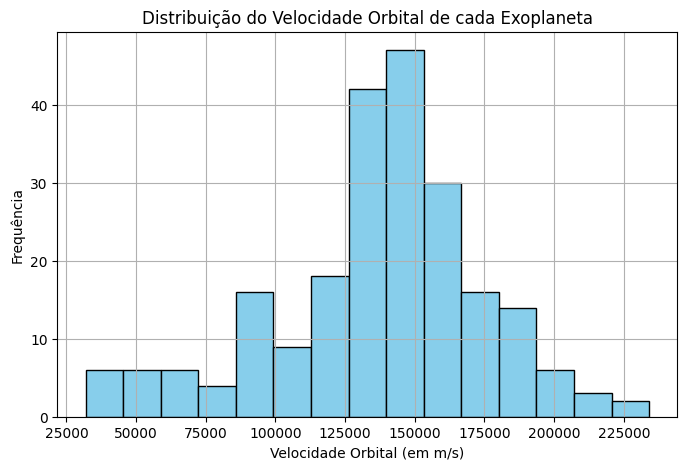

Velocidade Orbital: 136448.624873 m/s
Velocidade Orbital: 136.449 km/s
Velocidade Orbital: 491215.050 km/h


In [320]:
# v = √(GM/r)
# • É a velocidade instantânea necessária para uma órbita perfeitamente circular de raio r.
# • Depende só da posição (r) e da massa central (M).
Vorb_ind = 2 * math.pi * (df['pl_orbsmax'] * AU_m) / (df['pl_orbper'] * 86400)

# Histograma
plt.figure(figsize=(8, 5))
plt.hist(df['pl_orbper'].dropna(), bins=15, color='skyblue', edgecolor='black')
plt.title('Distribuição do Período Orbital dos Exoplanetas')
plt.xlabel('Período (em dias)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Histograma
plt.figure(figsize=(8, 5))
plt.hist(Vorb_ind, bins=15, color='skyblue', edgecolor='black')
plt.title('Distribuição do Velocidade Orbital de cada Exoplaneta')
plt.xlabel('Velocidade Orbital (em m/s)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

V_orb = Vorb_ind.mean()
print(f'Velocidade Orbital: {V_orb:3f} m/s\nVelocidade Orbital: {V_orb/1000:.3f} km/s\nVelocidade Orbital: {V_orb * 3.6:.3f} km/h')

 Note que a velocidade média da orbita desses exoplanetas é de ~136 km/s, uma velocidade alta, mas que é possível para exoplanetas muito próximos <br> de suas estrelas (comparável, por exemplo, com Mercúrio, que viaja a ~47 km/s).

 ### Raio de Hill (Região de Domínio Gravitacional do Planeta)

 O raio de Hill (ou esfera de Hill) de um corpo "pequeno" (por exemplo, um planeta) é a região ao redor desse corpo dentro da qual <br> sua atração gravitacional domina sobre a de um corpo "grande" em torno do qual ele orbita (por exemplo, uma estrela). Num sentido <br> prático, dentro do raio de Hill um satélite natural (como a lua) pode manter-se ligado ao planeta sem ser "arrancado" pela gravidade da estrela.

 - Interpretação
     - Se você colocar um satélite em órbita do planeta a uma distância menor que o raio de Hill, ele tende a permanecer ligado ao planeta.
     - Além do raio de Hill, a força gravitacional da estrela vence a do planeta e o satélite pode escapar para a estrela.

 - Exemplos de aplicação
     - Estimar o limite máximo para a existência de luas estáveis.
     - Em dinâmica de sistemas de vários planetas, determinar regiões de influência mútua.
     - Em estudos de captura de objetos (asteroides, cometas) por planetas.

In [321]:
# Raio de Hill
r_H = (a * AU_m) * math.cbrt(Mplaneta_kg / (3*Mmestre_kg))
print(f'Raio de Hill: {r_H:.3e} m\nRaio de Hill: {r_H/1000:.3e} km\nRaio de Hill: {r_H/AU_m:.5f} UA')

Raio de Hill: 9.446e+08 m
Raio de Hill: 9.446e+05 km
Raio de Hill: 0.00631 UA


 Isso nos mostra que, em média, esses exoplanetas possuem uma região de domínio gravitacional de cerca de $9.446 \cdot 10^5$ km. Comparando com <br> o da Terra (cerca de 0.01 UA), temos que:

In [322]:
print(f'Raio de Hill do Exoplaneta (média) / Raio de Hill da Terra: {(r_H / AU_m) / 0.01:.4f} UA')

Raio de Hill do Exoplaneta (média) / Raio de Hill da Terra: 0.6314 UA


 Ou seja, é 0.63 vezes mais estreito que o da Terra (63% do tamanho), cerca de 37\% mais estreito.

 ### Probabilidade de Trânsito

 A probabilidade de trânsito refere-se à chance de um planeta, em órbita ao redor de sua estrela, passar exatamente na linha de visão entre a estrela e <br> um observador (por exemplo, a Terra). Quando isso ocorre, vemos um "trânsito": um pequeno escurecimento periódico no brilho da estrela, causado <br> pela passagem do disco do planeta na frente do disco estelar.

 - Por que nem todo planeta "transita"?
     - Orientação aleatória de planos orbitais → a maioria das órbitas não está perfeitamente alinhada com nossa linha de visão.
     - Só se a inclinação orbital for próxima de 90° (a órbita “de lado”), o planeta vai cruzar o disco estelar visto da Terra.

 - Interpretação do resultado
     - Se R★/a = 0,1 → Pₜ ≃ 10 % → há 1 chance em 10 de o planeta transitar.
     - Quanto mais próxima a órbita (menor a), maior a probabilidade. Planetas “quentes” (a pequeno) transitam com muito mais frequência que planetas em órbitas longas.

 - Exemplo numérico
     - Terra: $R_{Sol}\approxeq 0,00465$ UA, $a_{Terra} = 1$ UA $\rightarrow P_t \approxeq 0,00465 \rightarrow 0,465\%$ (cerca de 1 em 215 chances de a Terra, vista de um lugar aleatório, transitar o Sol)
     - Kepler-10 b (planeta bem próximo): $R_{estrela}/a \approx 0,03 \rightarrow P_t \approxeq 3\%$

 - Aplicação prática
     - Em levantamentos de trânsito (como missões Kepler, TESS), a probabilidade de trânsito determina quantos planetas de uma dada população devemos esperar detectar.
     - Para estimar a taxa real de ocorrência de exoplanetas, corrige-se o número observado dividindo-se pela probabilidade geométrica de trânsito.

In [323]:
%%html
<img src="https://upload.wikimedia.org/wikipedia/commons/0/0d/Light_curve_of_binary_star_Kepler-16.jpg", width="500">
<img src="https://upload.wikimedia.org/wikipedia/commons/f/f8/Jupiter-io-transit_feb_10_2009.gif"> <br>
A curva de luz mostra a mudança na luminosidade da estrela como resultado <br> do trânsito. Os dados foram coletados pela missão Kepler.<br>

Média do Raio das Estrelas (em Raio Solar): 1.222
Média do Raio dos Planetas (em Raio de Júpiter): 1.103


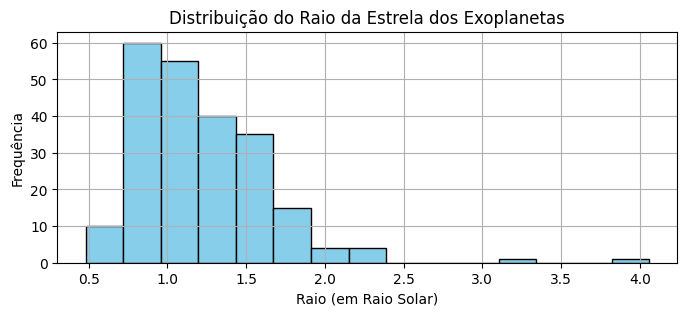

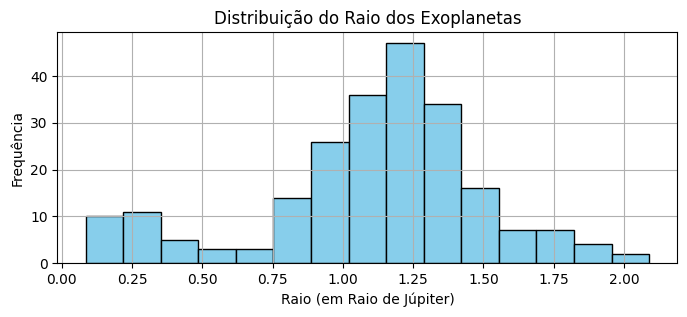

Probabilidade de Trânsito: 0.075


In [324]:
# Média do Raio das Estrelas
R_estrela = df['st_rad'].mean()

# Média do Raio dos Planetas
R_planeta = df['pl_radj'].mean()

print(f'Média do Raio das Estrelas (em Raio Solar): {R_estrela:.3f}')
print(f'Média do Raio dos Planetas (em Raio de Júpiter): {R_planeta:.3f}')

# Histograma (Raio das Estrelas)
plt.figure(figsize=(8, 3))
plt.hist(df['st_rad'].dropna(), bins=15, color='skyblue', edgecolor='black')
plt.title('Distribuição do Raio da Estrela dos Exoplanetas')
plt.xlabel('Raio (em Raio Solar)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Histograma (Raio dos Planetas)
plt.figure(figsize=(8, 3))
plt.hist(df['pl_radj'].dropna(), bins=15, color='skyblue', edgecolor='black')
plt.title('Distribuição do Raio dos Exoplanetas')
plt.xlabel('Raio (em Raio de Júpiter)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# print(f'Raio da Estrela (Raio Solar): {R_estrela}\nRaio da Estrela (UA): {}')
R_estrela_au = R_estrela * AU_rs
R_planeta_au = R_planeta * AU_rj
P_transito = (R_estrela_au + R_planeta_au) / a
print(f'Probabilidade de Trânsito: {P_transito:.3f}')

 Logo, podemos observar que, em média, esses exoplanetas possuem uma probabilidade de trânsito de $0.075 \approxeq 7\%$ ou seja, cerca de 3 em 40 chances de <br> observar esses exoplanetas transitar sua estrela.

 ## Utilizando Estatística
 Com esses dados em mãos, podemos agora utilizar a estatística para concluir algo sobre os sistemas de exoplanetas.

 ### Semieixo Maior
 Queremos calcular o IC (intervalo de confiança) de 95% para o Semieixo Maior, utilizando:
 $$
 IC = \overline{x} \pm z \cdot \frac{s}{\sqrt{n}}
 $$
 Onde
 - $\overline{x}$ é a média (0.083 UA)
 - $s$ é o desvio padrão amostral
 - $n$ = 225
 - $z$ para 95% $\approx$ 1.96

 Calculando variância e desvio padrão:

In [325]:
# Variância do Semieixo Maior
variancia_a = df['pl_orbsmax'].var()

# Desvio Padrão do Semieixo Maior
desvp_a = math.sqrt(variancia_a)

print(f'Variância: {variancia_a:.4f}\nDesvio padrão: {desvp_a:.4f}')

Variância: 0.0159
Desvio padrão: 0.1261


 Aplicando na fórmula:

In [326]:
# Parâmetros
z = 1.96
n = len(df['pl_orbsmax'].dropna())

# Cálculo do IC
IC_apos = a + z * desvp_a/math.sqrt(n)
IC_aneg = a - z * desvp_a/math.sqrt(n)
print(f'IC = [{IC_aneg:.4f}; {IC_apos:.4f}]')

IC = [0.0662; 0.0992]


 Com uma amostra de 225 planetas, o semieixo maior médio foi de 0,083 UA. Com um desvio padrão de 0,0159 UA, o intervalo de confiança <br> de 95% para a média populacional do semieixo maior está entre 0,0662 e 0,0992 UA. Isso sugere que a maioria dos exoplanetas analisados <br> orbita sua estrela a uma distância muito menor do que a da Terra em relação ao Sol (1 UA), reforçando o viés observacional na detecção de <br> exoplanetas com órbitas curtas.

 Poderiamos fazer testes de hipóteses para a média do semieixo maior. Se quisessemos comparar com a Terra, que possui semieixo maior <br> de 1 UA, e considerar essa a "recomendação" para que haja vida nesses exoplanetas, teríamos as seguintes hipóteses:

 $H_0$: o valor médio do semieixo maior é igual a 1 UA.<br>
 $H_a$: o valor médio do semieixo maior é menor que 1 UA.

 Como já foi mostrado, o valor médio do semieixo maior é, de fato, menor que 1 UA, então rejeitaríamos $H_0$ em favor de $H_a$. Logo, não há <br> como ter vida nesses exoplanetas. Utilizando T-Student para mostrar isso:
 $$
 t = \frac{\overline{x} - \mu_0}{s/\sqrt{n}}
 $$
 Onde
 - $\overline{x}$ = 0.083 UA
 - $s$ = 0.1261
 - $n$ = 225
 - $\mu_0$ = 1 UA (média sob $H_0$)

In [327]:
# Dados da amostra
media_hipotetica = 1        # valor de comparação (média sob H0)

# Cálculo do t
erro_padrao = desvp_a / math.sqrt(n)
t_calculado = (a - media_hipotetica) / erro_padrao

# Graus de liberdade
df = n - 1

# p-valor (unilateral, H1: média < 1)
p_valor = stats.t.cdf(t_calculado, df)

# Resultado
print(f'T-valor calculado: {t_calculado:.4f}')
print(f'P-valor (unilateral): {p_valor:.4e}')

# Conclusão
alpha = 0.05
if p_valor < alpha:
    print("Rejeitamos H0: A média é significativamente menor que 1 UA.")
else:
    print("Não rejeitamos H0: Não há evidência suficiente para afirmar que a média é menor que 1 UA.")

T-valor calculado: -109.1544
P-valor (unilateral): 1.6977e-196
Rejeitamos H0: A média é significativamente menor que 1 UA.


 Esse valor de $t$ é muito negativo (muito distante da média sob $H_0$), o que implica um probabilidade praticamente nula de isso acontecer ao <br> acaso se $H_0$ fosse verdadeira.

 ### Velocidade Orbital
 Faremos um cálculo de IC de 95% para a média encontrada, utilizando T-Student:


In [328]:
# Desvio padrão e intervalo de confiança, se quiser:
desvio_vorb = np.std(Vorb_ind, ddof=1)
n_orb = len(Vorb_ind)
erro_padrao = desvio_vorb / np.sqrt(n_orb)

# IC 95%
t_crit = t.ppf(1 - 0.05/2, df=n-1)
IC_inf = V_orb - t_crit * erro_padrao
IC_sup = V_orb + t_crit * erro_padrao

print(f"IC 95%: [{IC_inf/1000:.2f}; {IC_sup/1000:.2f}] km/s")

IC 95%: [131.41; 141.49] km/s


Com 95% de confiança, a verdadeira média da velocidade orbital de todos os exoplanetas da população (não só da sua amostra) está entre <br> 131,41 e 141,49 km/s. Se repetissemos esse processo com diferentes amostras (de mesmo tamanho), 95% dos intervalos calculados <br> conteriam a média real da população.

Supondo que queremos saber se a média da velocidade orbital dos exoplanetas é diferente da velocidade orbital da Terra (aproximadamente <br> 29,78 km/s), teríamos as seguintes hipósteses:

$H_0: \mu = 29.78$ km/s <br>
$H_a: \mu \ne 29.78$ km/s

In [338]:
# Dados
media_amostral = V_orb / 1000
mu_0 = 29.78
s = desvio_vorb/1000

# t-valor
t_val = (media_amostral - mu_0) / (s / math.sqrt(n))

# graus de liberdade
df = n_orb - 1

# p-valor (teste bicaudal)
p_val = 2 * stats.t.sf(np.abs(t_val), df)

print(f"Estatística t = {t_val:.3f}")
print(f"p-valor = {p_val:.3e}")

if p_val > 0.05:
    print("Possui velocidade orbital média semelhante ao da Terra (falha em rejeitar H0)")
else:
    print("A velocidade orbita média difere da velocidade orbital da Terra (rejeita H0)")


Estatística t = 41.693
p-valor = 1.553e-107
A velocidade orbita média difere da velocidade orbital da Terra (rejeita H0)


Como o p-valor é muito menor que 0.05, temos evidência estatisticamente significativa para rejeitar $H_0$. Com um nível de confiança de 95%, <br> a média da velocidade orbital dos exoplanetas da amostra é significativamente diferente da velocidade orbital da Terra.

 ### Probabilidade de Trânsito
 Temos que a probabilidade de trânsito entre os 225 sistemas observados é de 0.075. Queremos então calcular o valor esperado para 1000 <br> sistemas. Utilizaremos a <br>
 fórmula: $E = np$

 Onde
 - $E$ é o número esperado de eventos (exoplanetas com trânsito detectável),
 - $n$ é o número de estrelas observadas (ou sistemas com planetas),
 - $p$ = $P_{trânsito}$ é a probabilidade de um trânsito ocorrer para um sistema aleatório com características médias.

In [334]:
n_obs = 1000
E_transito = n_obs * P_transito
desvp_transito = math.sqrt(E_transito*(1-P_transito))

print(f'São esperados cerca de {E_transito:.2f} trânsitos.')
# print(f'Média: {E:.2f}')
print(f'Desvio padrão: {desvp_transito:.2f}')
print(f'Intervalo 1σ (68%): entre {E_transito - desvp_transito:.2f} e {E_transito + desvp_transito:.2f} detecções, aproximadamente.')

São esperados cerca de 75.01 trânsitos.
Desvio padrão: 8.33
Intervalo 1σ (68%): entre 66.68 e 83.34 detecções, aproximadamente.


 Podemos também calcular a probabilidade de observar exatamente 112 trânsitos em 1000 sistemas utilizando distribuição binomial:
 $$
 P(k; n, p) = \binom{n}{k} \cdot p^k \cdot q^{n-k}
 $$

In [335]:
# Parâmetro
k = 112

prob = binom.pmf(k, n_obs, P_transito)
print(f"P(X = 112): {prob:.3e}")

print(f'Note que: Z = {(k - E_transito)/desvp_transito:.2f}')

P(X = 112): 6.950e-06
Note que: Z = 4.44


 De acordo com o valor de $Z$ temos que 112 é mais de 4 desvios padrão acima da média, o que é extremamente improvável, como pode ser <br> percebido em $P(X = 112)$. Ou seja, a chance de observar exatamente 112 trânsitos entre 1000 estrelas com $p \approxeq 0.083$ é praticamente <br> zero, um evento altamente improvável. Um valor de $6.950 \cdot 10^{-6}$ significa que se você repetir esse experimento 1 milhão de vezes, <br> esperaria ver esse resultado apenas 6 vezes.

 - Na prática, pode indicar que:
     - Houve algum viés (por exemplo, erro de medição),
     - Ou o valor de $p$ usado no modelo não representa bem o verdadeiro sistema,
     - Ou é realmente um caso excepcional e raro.